## Importing Libraries

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from itertools import cycle

## Data Exploration & Preprocessing

In [203]:
df = pd.read_csv('Mall_Customers.csv')

In [204]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [205]:
df.shape

(200, 5)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [207]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [208]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Elbow Method
using the elbow method to find the optimal number of clusters

In [209]:
x_values = df.iloc[:, [3,4]].values

In [210]:
wcss = []
for i in range(1,11):
    #create kmeans model with i clusters 
    km = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    km.fit(x_values)
    #append wcss value of cluster into list
    wcss.append(km.inertia_)

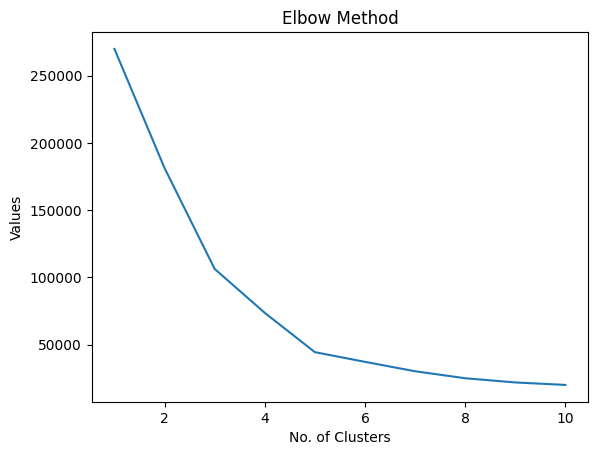

In [211]:
#plot graph to determine optimal number of clusters
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Values')
plt.show()

## KMeans Algorithm

In [212]:
km = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
#fit data points into kmeans model, the result is an array of each data points assigned cluster
y_kmeans = km.fit_predict(x_values)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [213]:
#find the centroids of each cluster
centers = km.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [214]:
#find the size of each cluster
cluster_counts = np.bincount(y_predicted)
cluster_counts

array([81, 39, 22, 35, 23])

In [215]:
#convert cluster size into a dataframe and rename column for clarity
cluster_df = pd.DataFrame(cluster_counts)
cluster_df.rename(columns={0: 'value'}, inplace=True)
cluster_df

,value
0,81
1,39
2,22
3,35
4,23


## Plotting Clusters

In [216]:
#create labels to assign indices to more intuitive labels
labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"}

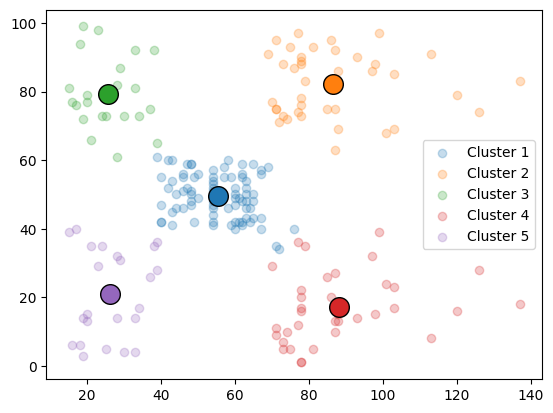

In [217]:
#cycle iterator for colors from the tab10 colormap
colors = cycle(cm.tab10.colors)
plt.figure()

for i in range(5):
    color = next(colors)
    index = (y_kmeans == i)
    #make the centroids bigger and more saturated than the other data points for visualisation
    plt.scatter(x_values[index, 0], x_values[index, 1], color=color, label=labels[i], alpha=0.25)
    plt.scatter(centers[i, 0], centers[i, 1], edgecolors="black", linewidth=1, color=color, s=200, alpha=1)

plt.legend()
plt.show()

## Conclusion
The 5 main clusters are customers with:
1. lower annual incomes and spending scores
2. higher annual incomes and higher spending scores
3. average annual incomes and average spending scores
4. lower annual incomes but higher spending scores
5. higher annual incomes but lower spending scores


The largest cluster is cluster 1, where customers have an average salary and spending power. They are most companies target audience and companies should promote their products to these customers the most.